In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from IPython.display import clear_output
import pandas as pd
import time
import sklearn.metrics
from sklearn.utils import shuffle
import seaborn as sns
%matplotlib inline

In [2]:
def  batch_gd_momentum(x_data, y_data, theta_0, theta_1, learning_rate, gamma, epoch):
    #theta_0,theta_1 are been assumed by 0
    
    error=[]    #list of cost function for every iteration
    theta_00=[]  #list of theta_0 function for every iteration
    theta_11=[]  #list of theta_1 function for every iteration
    
    vt_theta_0 = 0
    vt_theta_1 = 0
    
    m= len(x_data) # number of observations
    
    for i in range(epoch): 
        
        if len(error) > 2:
            if np.abs(error[-2] - error[-1]) < 0.001:
                return error, theta_00, theta_11
        
        h = theta_1*x_data+theta_0 # hypothesis fuction
        e = h-y_data #error
        
        j= 1/(2*m)*np.dot(e,e) #calculating the cost fuction 
        
        plt.figure(figsize=(12, 6), dpi=80)
        plt.scatter(x_data, y_data) #ploting the data
        clear_output(wait=True)
        
        
        plt.plot(x_data, h) #ploting a line
        r2_score = sklearn.metrics.r2_score(y_data,h) #calculating r2 score for every epoch
        
        print("theta_0= "+str(theta_0),"theta_1= "+str(theta_1),"cost function= "+str(j),
                      "r2_score= "+str(r2_score),sep="\n")
        print("iter no.= "+ str(i))
        
        plt.xlabel("x_data")
        plt.ylabel("y_data")
        plt.title("plotting a line with different parameters (theta_0,theta_1)")
        plt.show()
        time.sleep(0.1)
        
        #Update the parameters (simultaneously)
        theta_0_grad = learning_rate*(1/m)*np.sum(h-y_data)
        vt_theta_0 = (gamma*vt_theta_0) + theta_0_grad
        
        theta_1_grad = learning_rate*(1/m)*np.dot(e, x_data)
        vt_theta_1 = (gamma*vt_theta_1) + theta_1_grad
                                             
        theta_0 = theta_0 - vt_theta_0
        theta_1 = theta_1 - vt_theta_1
        
        error.append(j)
        theta_00.append(theta_0)
        theta_11.append(theta_1)
        

    return error, theta_00, theta_11

theta_0= 0.2914895227892944
theta_1= -0.865293873817112
cost function= 0.38009581594639785
r2_score= 0.9780885941395606
iter no.= 81


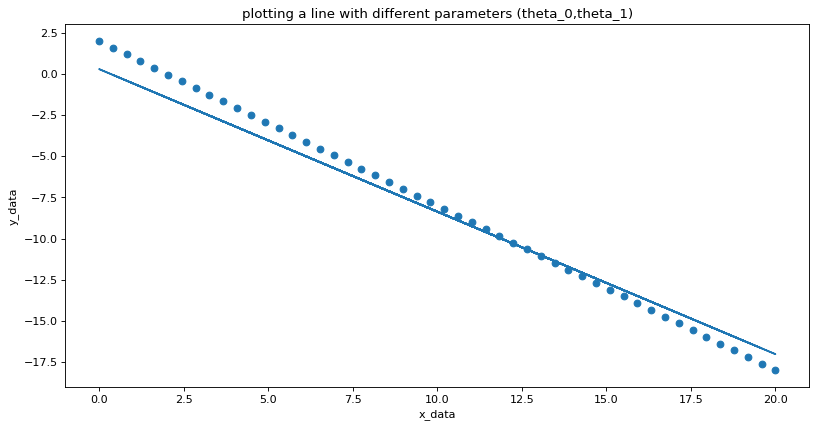

In [10]:
a = -1
b = 2

x=np.linspace(0,20)
y=a*x + b

x, y = shuffle(x, y, random_state=0)


theta_0=0
theta_1=0
learning_rate = 0.001
gamma = 0.9
epoch = 10000000
error, theta_00, theta_11=batch_gd_momentum(x, y, theta_0, theta_1, learning_rate, gamma, epoch)

(Text(0, 0.5, 'cost_function(j)'),)

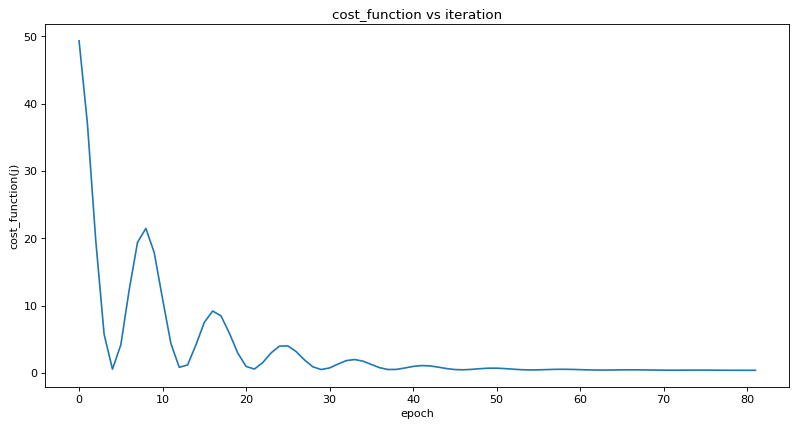

In [11]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(error)
plt.title("cost_function vs iteration")
plt.xlabel("epoch")
plt.ylabel("cost_function(j)"),

(Text(0, 0.5, 'cost_function(j)'),)

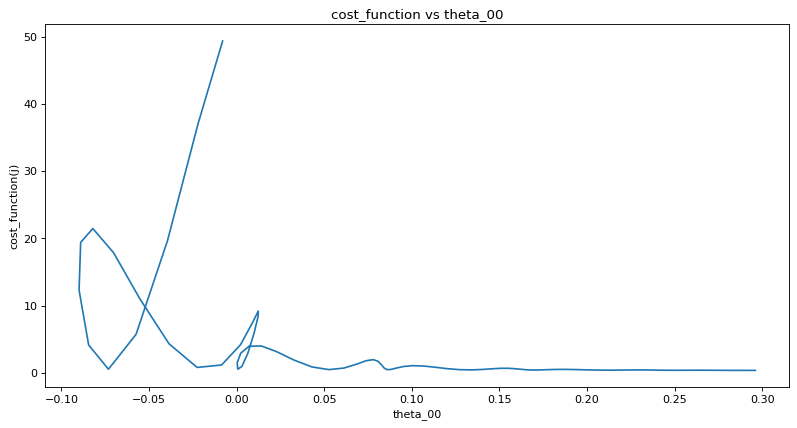

In [5]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(theta_00, error)
plt.title("cost_function vs theta_00")
plt.xlabel("theta_00")
plt.ylabel("cost_function(j)"),

(Text(0, 0.5, 'cost_function(j)'),)

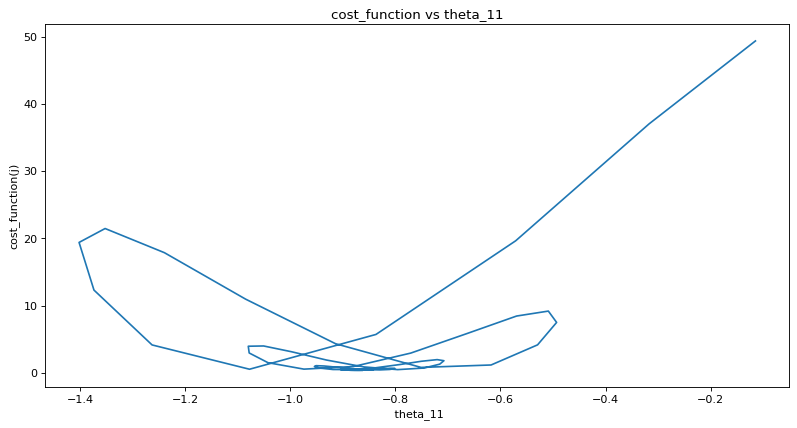

In [6]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(theta_11, error)
plt.title("cost_function vs theta_11")
plt.xlabel(" theta_11")
plt.ylabel("cost_function(j)"),

In [7]:
def  batch_gd_NAG(x_data, y_data, theta_0, theta_1, learning_rate, gamma, epoch):
    #theta_0,theta_1 are been assumed by 0
    
    error=[]    #list of cost function for every iteration
    theta_00=[]  #list of theta_0 function for every iteration
    theta_11=[]  #list of theta_1 function for every iteration
    
    vt_theta_0 = 0
    vt_theta_1 = 0
    
    m= len(x_data) # number of observations
    
    for i in range(epoch): 
        
        if len(error) > 2:
            if np.abs(error[-2] - error[-1]) < 0.001:
                return error, theta_00, theta_11
        
        h = theta_1*x_data+theta_0 # hypothesis fuction
        
        
        e = h-y_data #error
        
        j= 1/(2*m)*np.dot(e,e) #calculating the cost fuction
          
        
        plt.figure(figsize=(12, 6), dpi=80)
        plt.scatter(x_data, y_data) #ploting the data
        clear_output(wait=True)
        
        plt.plot(x_data, h) #ploting a line
        r2_score = sklearn.metrics.r2_score(y_data,h) #calculating r2 score for every epoch
        
        print("theta_0= "+str(theta_0),"theta_1= "+str(theta_1),"cost function= "+str(j),
                      "r2_score= "+str(r2_score),sep="\n")
        print("iter no.= "+ str(i))
        
        plt.xlabel("x_data")
        plt.ylabel("y_data")
        plt.title("plotting a line with different parameters (theta_0,theta_1)")
        plt.show()
        time.sleep(0.1)
        
        #Update the parameters (simultaneously)
        
        
        
        theta_0_temp = theta_0 - (gamma*vt_theta_0)
        theta_1_temp = theta_1 - (gamma*vt_theta_1)
        
        h_temp = theta_1_temp*x_data+theta_0_temp
        e_temp = h_temp-y_data
        
        theta_0_temp_grad = learning_rate*(1/m)*np.sum(e_temp)
        theta_1_temp_grad = learning_rate*(1/m)*np.dot(e_temp, x_data)
        
        theta_0 = theta_0_temp - theta_0_temp_grad
        vt_theta_0 = (gamma*vt_theta_0) + theta_0_temp_grad
        
        theta_1 = theta_1_temp - theta_1_temp_grad
        vt_theta_1 = (gamma*vt_theta_1) + theta_1_temp_grad
        
        
        
        error.append(j)
        theta_00.append(theta_0)
        theta_11.append(theta_1)
        

    return error, theta_00, theta_11

theta_0= 0.06369855587260474
theta_1= -0.8432626538233149
cost function= 0.4942091593809137
r2_score= 0.9715102955180415
iter no.= 33


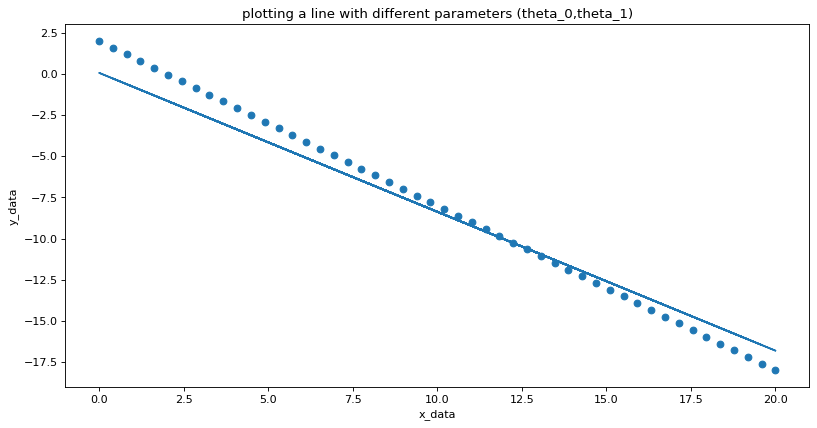

In [12]:
a = -1
b = 2

x=np.linspace(0,20)
y=a*x + b

x, y = shuffle(x, y, random_state=0)


theta_0=0
theta_1=0
learning_rate = 0.001
gamma = 0.9
epoch = 200

error, theta_00, theta_11=batch_gd_NAG(x, y, theta_0, theta_1, learning_rate, gamma, epoch)


(Text(0, 0.5, 'cost_function(j)'),)

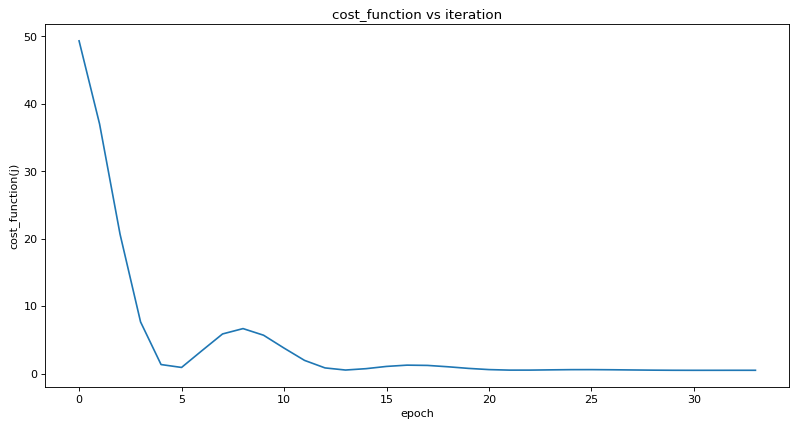

In [13]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(error)
plt.title("cost_function vs iteration")
plt.xlabel("epoch")
plt.ylabel("cost_function(j)"),

(Text(0, 0.5, 'cost_function(j)'),)

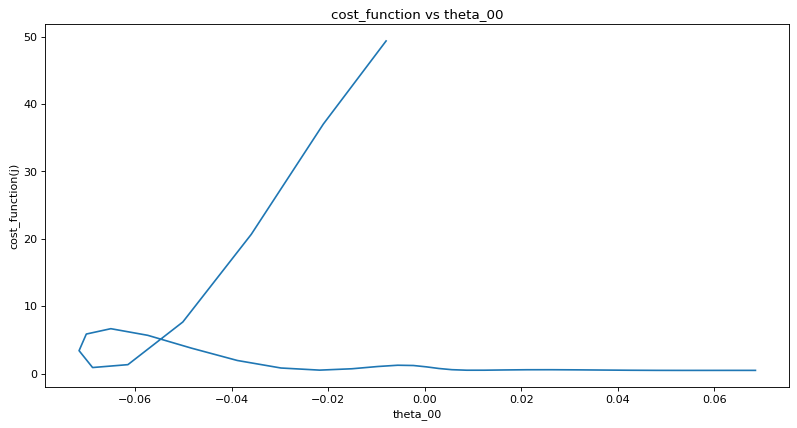

In [14]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(theta_00, error)
plt.title("cost_function vs theta_00")
plt.xlabel("theta_00")
plt.ylabel("cost_function(j)"),

(Text(0, 0.5, 'cost_function(j)'),)

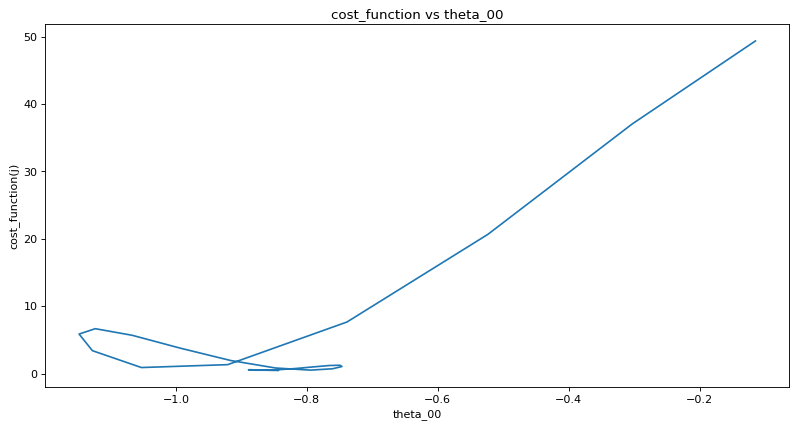

In [15]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(theta_11, error)
plt.title("cost_function vs theta_00")
plt.xlabel("theta_00")
plt.ylabel("cost_function(j)"),